Time dependent Scrödinger equation
==================================

We want to describe an electron wavefunction by a wavepacket
$\psi (x,y)$ that is a function of position $x$ and time $t$. We assume
that the electron is initially localized around $x_0$, and model this by
a Gaussian multiplying a plane wave:
$$\psi(x,t=0)=\exp{\left[-\frac{1}{2}\left(\frac{x-x_0}{\sigma _0}
\right)^2\right ]} e^{ik_0x}
$$

This wave function does not correspond to an electron with a well
defined momentum. However, if the width of the Gaussian $\sigma _0$ is
made very large, the electron gets spread over a sufficiently large
region of space and can be considered as a plane wave with momentum
$k_0$ with a slowly varying amplitude.

The behavior of this wave packet as a function of time is described by
the time-dependent Schröedinger equation (here in 1d):

$$i\frac{\partial \psi}{\partial t}=H\psi(x,t).$$ 

$H$ is the Hamiltonian operator:

$$H=-\frac{1}{2m}\frac{\partial ^2}{\partial x^2}+V(x),$$ 

where $V(x)$ is a time independent potential. The
Hamiltonian is chosen to be real. we have picked teh energy units such
that $\hbar=1$, and from now on, we will pick mass units such that
$2m=1$ to make equations simpler.

Scrhödinger’s equation is obviously a PDE, and we can use
generalizations of the techniques learned in previous sections to solve
it. The main observation is that this time we have to deal with complex
numbers, and the function $\psi (x,y)$ has real and imaginary parts:
$$\psi (x,t) = R(x,t)+iI(x,t).$$ However, is this section we will
present an alternative method that makes the quantum mechanical nature
of this problem more transparent.

The time-evolution operator
---------------------------

The Scrödinger equation (\[time\]) can be integrated in a formal sense
to obtain: 
$$\psi(x,t)=U(t)\psi(x,t=0)=e^{-iHt}\psi(x,t).$$ 

From here we deduce that the wave function can be
evolved forward in time by applying the time-evolution operator
$U(t)=\exp{-iHt}$: $$\psi(t+\Delta t)= e^{-iH\delta t}\psi(t).$$
Likewise, the inverse of the time-evolution operator moves the wave
function back in time: $$\psi(t-\Delta t)=e^{iH\Delta t}\psi(t),$$ where
we have use the property $$U^{-1}(t)=U(-t).$$ Although it would be nice
to have an algorithm based on the direct application of $U$, it has been
shown that this is not stable. Hence, we apply the following relation:
$$\psi(t+\Delta t)=\psi(t-\Delta t)+\left[e^{-iH\Delta t}-e^{iH\Delta
t}\right]\psi(t).$$ Now, the derivatives with recpect to $x$ can be
approximated by 

$$\begin{aligned}
\frac{\partial \psi}{\partial t}
&\sim& \frac{\psi(x,t+\Delta t)-\psi(x, \Delta t)}{\Delta t}, \\
\frac{\partial ^2 \psi}{\partial x^2} &\sim& \frac{\psi(x+\Delta  %
x,t)+\psi(x-\Delta x,t)-2\psi(x,t)}{(\Delta x)^2}.
\end{aligned}$$ 

The time evolution operator is
approximated by: $$U(\Delta t)=e^{-iH\Delta t} \sim 1+iH\Delta t.$$
Replacing the expression (\[hami\]) for $H$, we obtain:

$$\psi(x,t+\Delta t)=\psi(x,t-\Delta t)-2i[(2\alpha+\Delta t
V(x))\psi(x,t)-\alpha(\psi(x+\Delta x,t)+\psi(x-\Delta x,t))],
$$ 

with $\alpha=\frac{\Delta t}{(\Delta x)^2}$. The
probability of finding an electron at $(x,t)$ is given by
$|\psi(x,t)|^2$. This equations do no conserve this probability exactly,
but the error is of the order of $(\Delta t)^2$. The convergence can be
determined by using smaller steps.

### Exercise 8.1: Single-slit diffraction 
Young’s single-slit experiment consists of a wave passing though a small
slit, which causes the emerging wavelets to intefere with eachother
forming a diffraction pattern. In quantum mechanics, where particles are
represented by probabilities, and probabilities by wave packets, it
means that the same phenomenon should occur when a particle (electron,
neutron) passes though a small slit. Consider a wave packet of initial
width 3 incident on a slit of width 5, and plot the probability density
$|\psi ^2|$ as the packet crosses the slit. Generalize the
time-evolution equation (\[time\_diff\]) for 2 dimensions. Model the
slit with a potential wall:
$$V(x,y)=100 \,\,\,\,\,\ \mathrm{for}\,\,x=10,|y|\geq 2.5.$$

2.0


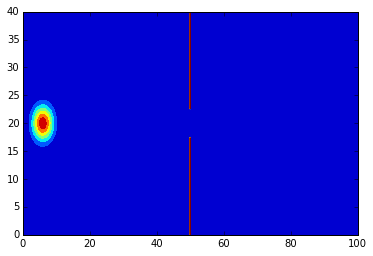

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math

lx=100
ly=40
dx = 0.1
dy = 0.1
nx = int(lx/dx)
ny = int(ly/dy)
dt = 0.02

alpha = dt/dx**2
print alpha

psi0_r = np.zeros(shape=(ny+1,nx+1))
psi0_i = np.zeros(shape=(ny+1,nx+1))
psi1_r = np.zeros(shape=(ny+1,nx+1))
psi1_i = np.zeros(shape=(ny+1,nx+1))
psi2_r = np.zeros(shape=(ny+1,nx+1))
psi2_i = np.zeros(shape=(ny+1,nx+1))

#Define your potential wall
V = np.zeros(shape=(ny+1,nx+1))
for y in range(0,ny):
    if(abs(y*dy-ly/2)>2.5):
        V[y,nx/2] = 100.

#Initial conditions: wave packet
sigma2 = 3.**2
k0 = np.pi/4
x0 = 6.
y0 = ly/2.
for x in range(0,nx):
    for y in range(0,ny):
        psi0_r[y,x] = math.exp(-0.5*((x*dx-x0)**2+(y*dy-y0)**2)/sigma2)*math.cos(k0*x*dx)
        psi0_i[y,x] = math.exp(-0.5*((x*dx-x0)**2+(y*dy-y0)**2)/sigma2)*math.sin(k0*x*dx)

x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)

pyplot.contourf(X,Y,psi0_r**2+psi0_i**2)
pyplot.contour(X,Y,V)


def solve(i):
    global psi0_r, psi0_i, psi1_r, psi1_i, psi2_r, psi1_i

    for x in range(0,nx):
        for y in range(0,nx):
            a=4
        #        your differential equation here

    for x in range(0,nx):
        for y in range(0,nx):
            psi0_r[y,x] = psi1_r[y,x]
            psi0_i[y,x] = psi1_i[y,x]
            psi1_r[y,x] = psi2_r[y,x]
            psi1_i[y,x] = psi2_i[y,x]

